In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,  LabelEncoder
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
iris_dataset = pd.read_csv('iris.csv')

# Sprawdzenie pierwszych kilku wierszy wczytanego zbioru danych
print(iris_dataset.head())

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [20]:
# Poprawa nazw kolumn - zamiana '.' na '_'
iris_dataset.columns = iris_dataset.columns.str.replace('.', '_')

# Sprawdzenie poprawności
print(iris_dataset.head())

   sepal_length  sepal_width  petal_length  petal_width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


Epoch 1/100
24/24 [==============================] - 0s 14ms/step - loss: 3.8585 - accuracy: 0.3333 - val_loss: 3.8391 - val_accuracy: 0.3333
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 3.2700 - accuracy: 0.3333 - val_loss: 3.3045 - val_accuracy: 0.3333
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 2.8006 - accuracy: 0.3333 - val_loss: 2.8000 - val_accuracy: 0.3333
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 2.3727 - accuracy: 0.3333 - val_loss: 2.3612 - val_accuracy: 0.3333
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 1.9930 - accuracy: 0.3333 - val_loss: 1.9527 - val_accuracy: 0.3333
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 1.6517 - accuracy: 0.3333 - val_loss: 1.5676 - val_accuracy: 0.3333
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 1.3322 - accuracy: 0.3333 - val_loss: 1.2372 - val_accuracy: 0.3333
Epoch 8/100


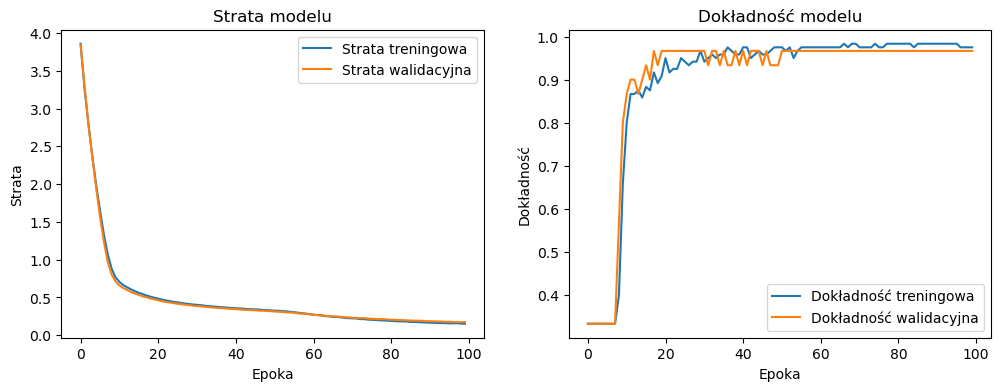

In [22]:
# Podział na cechy(x) i etykiety (y)
X = iris_dataset.iloc[:, :-1].values  # Wszystkie kolumny oprócz ostatniej (cechy)
y = iris_dataset.iloc[:, -1].values   # Ostatnia kolumna to etykiety (gatunki)

# Zamiana etykiet na liczby (LabelEncoder)
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)  # Zamiana nazw gatunków na liczby

# Zamiana etykiet na one-hot encoding
one_hot_encoder = OneHotEncoder(sparse=False) 
y_one_hot = one_hot_encoder.fit_transform(y.reshape(-1, 1))

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Budowa modelu sieci neuronowej
model = Sequential([
    Dense(10, activation='relu', input_shape=(4,)),
    Dense(3, activation='softmax')
])

# Kompilacja modelu
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Trenowanie modelu
epochs = 100
history = model.fit(X_train, y_train, epochs=epochs, batch_size=5, validation_data=(X_test, y_test))

# Ocena modelu
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Wizualizacja procesu uczenia
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Strata treningowa')
plt.plot(history.history['val_loss'], label='Strata walidacyjna')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.legend()
plt.title('Strata modelu')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Dokładność treningowa')
plt.plot(history.history['val_accuracy'], label='Dokładność walidacyjna')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()
plt.title('Dokładność modelu')

plt.show()


Wnioski z treningu modelu sieci neuronowej na zbiorze Iris:

    Model osiągnął wysoką dokładność na zbiorze testowym (96.67%), co wskazuje na skuteczność nauki i zdolność do klasyfikacji gatunków kwiatów.
    Krzywe uczenia pokazują stabilny spadek wartości funkcji straty i wzrost dokładności, co sugeruje, że model nie jest ani niedouczony, ani przeuczony – zachowuje dobrą zdolność generalizacji.